## PIP Installs

In [29]:
!pip install swig

In [30]:
!pip install gymnasium[box2d]

In [31]:
!pip install renderlab

In [32]:
! pip install shimmy

## Describe Basic Functions(Step,Reset,Render)

## Βασικές συναρτήσεις ενός περιβάλλοντος Gymnasium

Κάθε περιβάλλον **Gymnasium** (βιβλιοθήκη για Reinforcement Learning) παρέχει τρεις βασικές συναρτήσεις που επιτρέπουν την αλληλεπίδραση ενός **agent** με το **περιβάλλον**: `reset`, `step`, και `render`.

---

### 1) `reset()`

**Σκοπός:** Έναρξη νέας επεισοδίου (*episode*).

**Λειτουργία:**
- Επαναφέρει το περιβάλλον στην αρχική του κατάσταση.
- Χρησιμοποιείται στην αρχή κάθε επεισοδίου.
- Μπορεί να δεχτεί παραμέτρους όπως `seed` για έλεγχο της τυχαιότητας.

**Επιστρέφει:**
- `observation`: την αρχική παρατήρηση του περιβάλλοντος.
- `info`: λεξικό με επιπλέον πληροφορίες.

```python
observation, info = env.reset()

### 2) `step(action)`

**Ρόλος:** Εκτέλεση ενέργειας και μετάβαση στο επόμενο χρονικό βήμα.

Η συνάρτηση `step(action)` δέχεται ως είσοδο μία ενέργεια από τον agent και ενημερώνει το περιβάλλον σύμφωνα με αυτή. Μετά την εκτέλεση της ενέργειας, επιστρέφει τη νέα παρατήρηση, την ανταμοιβή και πληροφορίες σχετικά με το αν το επεισόδιο έχει ολοκληρωθεί.

**Επιστρέφει:**
- `next_observation`: νέα παρατήρηση του περιβάλλοντος  
- `reward`: ανταμοιβή που έλαβε ο agent  
- `terminated`: αν το επεισόδιο ολοκληρώθηκε κανονικά (επιτυχία ή αποτυχία)  
- `truncated`: αν το επεισόδιο διακόπηκε (π.χ. λόγω χρονικού ορίου)  
- `info`: επιπλέον πληροφορίες  

```python
next_obs, reward, terminated, truncated, info = env.step(action)

### 3) `render()`

**Ρόλος:** Οπτικοποίηση της τρέχουσας κατάστασης του περιβάλλοντος.

Η συνάρτηση `render()` χρησιμοποιείται για την απεικόνιση του περιβάλλοντος κατά την εκτέλεση του επεισοδίου. Ο τρόπος απεικόνισης καθορίζεται από το `render_mode` που ορίζεται κατά τη δημιουργία του περιβάλλοντος.

**Συνήθη render modes:**
- `human`: γραφική απεικόνιση για άμεση παρατήρηση από άνθρωπο  
- `rgb_array`: επιστρέφει εικόνα σε μορφή πίνακα RGB  

```python
env.render()

## Describe Luna-Lander

## **LunarLander-v3 — Περιγραφή Περιβάλλοντος**

### **Observation Space**

Το **observation space** στο LunarLander-v3 είναι ένας **διανυσματικός χώρος 8 διαστάσεων** (`Box(8)`), με στοιχεία που περιγράφουν τη φυσική κατάσταση του lander:  
- Θέση σε **x** και **y**  
- Γραμμικές ταχύτητες σε **x** και **y**  
- **Γωνία** και **γωνιακή ταχύτητα**  
- Δύο boolean δείκτες που υποδεικνύουν αν τα πόδια του lander έχουν επαφή με το έδαφος ή όχι  
Αυτή η παρατήρηση δίνεται ως λίστα 8 float τιμών σε κάθε χρονικό βήμα.
---

### **Action Space**

Το **action space** είναι **διακριτό (Discrete(4))** με **4 διαθέσιμες ενέργειες**:  
0. **Do nothing** — κανένας κινητήρας δεν ενεργοποιείται  
1. **Fire left orientation engine** — ενεργοποιεί τον αριστερό κινητήρα προσανατολισμού  
2. **Fire main engine** — ενεργοποιεί τον κύριο κινητήρα  
3. **Fire right orientation engine** — ενεργοποιεί τον δεξιό κινητήρα προσανατολισμού  
Ο agent επιλέγει μία από αυτές τις ενέργειες σε κάθε βήμα του περιβάλλοντος.  

---

### **Reward Function**

Η συνάρτηση ανταμοιβής σχεδιάζεται έτσι ώστε να ενθαρρύνει **σταθερή και ομαλή προσγείωση** όσο πιο κοντά γίνεται στο landing pad:  
- Η ανταμοιβή αυξάνεται όσο **πλησιάζει** το lander στο landing pad και **μειώνεται** όσο απομακρύνεται.  
- Η ανταμοιβή αυξάνεται όσο **μικραίνει η ταχύτητα** και **σταθεροποιείται η γωνία** του lander.  
- **+10 πόντοι** για κάθε πόδι που έχει επαφή με το έδαφος σε κάθε βήμα.  
- **Ποινές** για χρήση κινητήρων:  
  - (-0.03) για κάθε βήμα που λειτουργεί **πλευρικός κινητήρας**  
  *(-0.3 για κύριο κινητήρα)*  
- To επεισόδιο λαμβάνει επιπλέον +100 πόντους εάν προσγειωθεί σωστά(-100 αν γίνει συντριβή)
- Η συνολική ανταμοιβή είναι το άθροισμα των επιμέρους ανταμοιβών σε όλη τη διάρκεια του επεισοδίου.  
Ο στόχος του agent είναι να **μεγιστοποιήσει** την αθροιστική ανταμοιβή, προσγειώνοντας ομαλά χωρίς να χτυπήσει.  

## Create Random Agent

In [33]:
import gymnasium as gym
import renderlab as rl

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    action = env.action_space.sample()

    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        break

# Play the recorded video
env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## Run For 5 Episodes and Calculate Score

In [78]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")

episodes = 5
episode_scores = []

for i in range(episodes):
    observation, info = env.reset()
    total_reward = 0

    while True:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            break

    episode_scores.append(total_reward)

env.close()

average_score = sum(episode_scores) / len(episode_scores)
print(f"Scores for each episode: {episode_scores}")
print(f"Average score over {episodes} episodes: {average_score:.2f}")

Scores for each episode: [np.float64(-231.25759833614455), np.float64(-110.79553616567715), np.float64(-297.10962389204167), np.float64(-424.4579940436286), np.float64(-151.1672260917687)]
Average score over 5 episodes: -242.96


In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install stable-baselines3

## Train DQN, PPO


In [36]:
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.env_util import make_vec_env
import time

# Create a vectorized LunarLander-v3 environment
env = make_vec_env("LunarLander-v3", n_envs=1, seed=0)

print("Environment created successfully.")

Environment created successfully.


In [37]:
model = DQN("MlpPolicy", env, learning_rate=1e-3, buffer_size=10000, train_freq=1, gradient_steps=1, verbose=1)

start_time = time.time()
model.learn(total_timesteps=100000, log_interval=4)
end_time = time.time()

dqn_train_time = end_time - start_time

print("DQN agent trained successfully.")
print(f"DQN training time: {dqn_train_time:.2f} seconds")

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.8     |
|    ep_rew_mean      | -218     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 279      |
|    time_elapsed     | 1        |
|    total_timesteps  | 347      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.41     |
|    n_updates        | 246      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.6     |
|    ep_rew_mean      | -223     |
|    exploration_rate | 0.924    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 176      |
|    time_elapsed     | 4        |
|    total_timesteps  | 797      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 3        |
|  

In [38]:
model_ppo = PPO("MlpPolicy", env, learning_rate=0.0003, n_steps=2048, verbose=1)

start_time = time.time()
model_ppo.learn(total_timesteps=100000, log_interval=4)
end_time = time.time()

ppo_train_time = end_time - start_time

print("PPO agent trained successfully.")
print(f"PPO training time: {ppo_train_time:.2f} seconds")

Using cpu device
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 90          |
|    ep_rew_mean          | -160        |
| time/                   |             |
|    fps                  | 419         |
|    iterations           | 4           |
|    time_elapsed         | 19          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.010465207 |
|    clip_fraction        | 0.0198      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.00386    |
|    learning_rate        | 0.0003      |
|    loss                 | 534         |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00676    |
|    value_loss           | 880         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean 

## Evaluate DQN, PPO


In [39]:

import matplotlib.pyplot as plt
import numpy as np

env_eval = gym.make("LunarLander-v3", render_mode="rgb_array")

env_eval_rendered = rl.RenderFrame(env_eval, "./DQN_eval_video")

print("Evaluation environment and renderlab initialized successfully.")

Evaluation environment and renderlab initialized successfully.


DQN Scores for each episode: [np.float64(103.4827309236102), np.float64(125.37246321682022), np.float64(159.7538014764631), np.float64(269.31165269051417), np.float64(146.28186285723774)]
Average DQN score over 5 episodes: 160.84


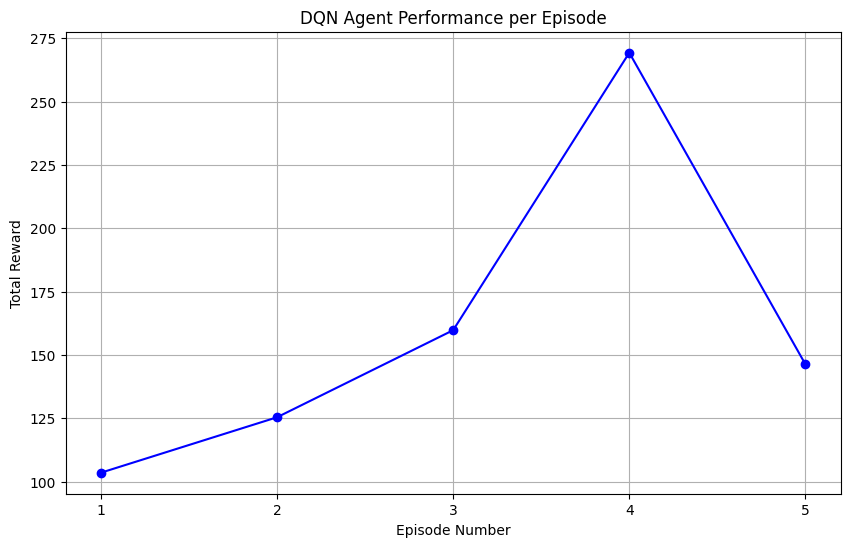

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [84]:
num_eval_episodes = 5
dqn_episode_scores = []

for i in range(num_eval_episodes):
    obs, info = env_eval_rendered.reset()
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env_eval_rendered.step(action)
        total_reward += reward

    dqn_episode_scores.append(total_reward)

    # Play the recorded video for each episode
    #env_eval_rendered.play() # Uncomment if you want to play each video immediately

print(f"DQN Scores for each episode: {dqn_episode_scores}")

average_dqn_score = np.mean(dqn_episode_scores)
print(f"Average DQN score over {num_eval_episodes} episodes: {average_dqn_score:.2f}")

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_eval_episodes + 1), dqn_episode_scores, marker='o', linestyle='-', color='b')
plt.title('DQN Agent Performance per Episode')
plt.xlabel('Episode Number')
plt.ylabel('Total Reward')
plt.grid(True)
plt.xticks(range(1, num_eval_episodes + 1))
plt.show()

env_eval_rendered.play()
env_eval.close()


In [41]:
env_eval_ppo = gym.make("LunarLander-v3", render_mode="rgb_array")
env_eval_ppo_rendered = rl.RenderFrame(env_eval_ppo, "./PPO_eval_video")

print("PPO Evaluation environment and renderlab initialized successfully.")

PPO Evaluation environment and renderlab initialized successfully.


PPO Scores for each episode: [np.float64(-180.61461957096577), np.float64(-109.2401350445268), np.float64(-275.67185851160855), np.float64(-184.85893112263793), np.float64(-175.77752748353691)]
Average PPO score over 5 episodes: -185.23


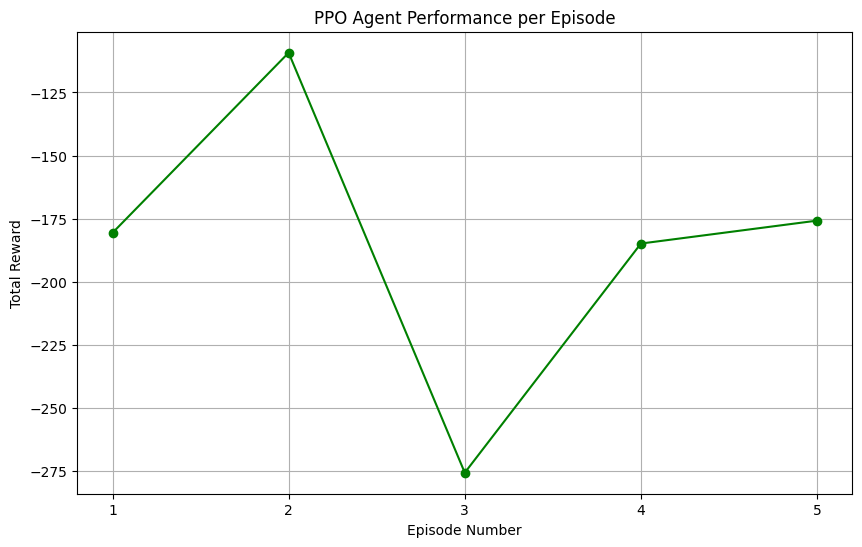

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [72]:
num_eval_episodes = 5
ppo_episode_scores = []

for i in range(num_eval_episodes):
    obs, info = env_eval_ppo_rendered.reset()
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action, _states = model_ppo.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env_eval_ppo_rendered.step(action)
        total_reward += reward

    ppo_episode_scores.append(total_reward)

print(f"PPO Scores for each episode: {ppo_episode_scores}")

average_ppo_score = np.mean(ppo_episode_scores)
print(f"Average PPO score over {num_eval_episodes} episodes: {average_ppo_score:.2f}")

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_eval_episodes + 1), ppo_episode_scores, marker='o', linestyle='-', color='g')
plt.title('PPO Agent Performance per Episode')
plt.xlabel('Episode Number')
plt.ylabel('Total Reward')
plt.grid(True)
plt.xticks(range(1, num_eval_episodes + 1))
plt.show()

env_eval_ppo_rendered.play()
env_eval_ppo.close()

In [73]:
print(f"DQN Agent - Average Evaluation Score: {average_dqn_score:.2f}")
print(f"DQN Agent - Training Time: {dqn_train_time:.2f} seconds\n")

print(f"PPO Agent - Average Evaluation Score: {average_ppo_score:.2f}")
print(f"PPO Agent - Training Time: {ppo_train_time:.2f} seconds")

DQN Agent - Average Evaluation Score: 178.95
DQN Agent - Training Time: 491.07 seconds

PPO Agent - Average Evaluation Score: -185.23
PPO Agent - Training Time: 124.20 seconds


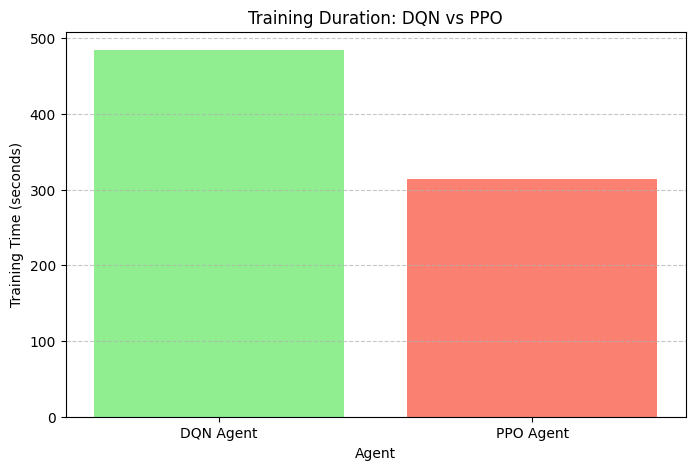

In [44]:
training_times = [dqn_train_time, ppo_train_time]
agents = ['DQN Agent', 'PPO Agent']

plt.figure(figsize=(8, 5))
plt.bar(agents, training_times, color=['lightgreen', 'salmon'])
plt.xlabel('Agent')
plt.ylabel('Training Time (seconds)')
plt.title('Training Duration: DQN vs PPO')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Best Hyperparameters

In [45]:
model = DQN(
    "MlpPolicy",
    env,
    learning_rate=6.3e-4,
    buffer_size=100000,
    batch_size=128,
    train_freq=4,
    gradient_steps=4,
    target_update_interval=250,
    exploration_fraction=0.12,
    exploration_final_eps=0.1,
    gamma=0.99,
    verbose=1,
)
start_time = time.time()
model.learn(total_timesteps=100000, log_interval=4)
end_time = time.time()

dqn_train_time = end_time - start_time

print("DQN agent trained successfully.")
print(f"DQN training time: {dqn_train_time:.2f} seconds")

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.5     |
|    ep_rew_mean      | -134     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 315      |
|    time_elapsed     | 1        |
|    total_timesteps  | 370      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.71     |
|    n_updates        | 268      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.2     |
|    ep_rew_mean      | -179     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 321      |
|    time_elapsed     | 2        |
|    total_timesteps  | 786      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.32     |
|  

DQN Scores for each episode: [np.float64(258.1130311679863), np.float64(95.13005769985745), np.float64(264.6512010560059), np.float64(134.99928793067338), np.float64(141.83283427560457)]
Average DQN score over 5 episodes: 178.95


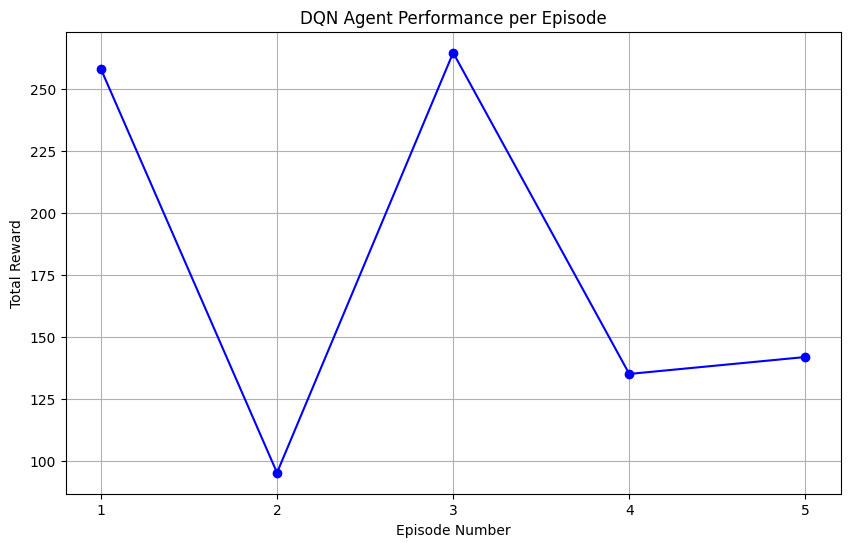

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [46]:
num_eval_episodes = 5
dqn_episode_scores = []

for i in range(num_eval_episodes):
    obs, info = env_eval_rendered.reset()
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env_eval_rendered.step(action)
        total_reward += reward

    dqn_episode_scores.append(total_reward)

    # Play the recorded video for each episode
    #env_eval_rendered.play() # Uncomment if you want to play each video immediately

print(f"DQN Scores for each episode: {dqn_episode_scores}")

average_dqn_score = np.mean(dqn_episode_scores)
print(f"Average DQN score over {num_eval_episodes} episodes: {average_dqn_score:.2f}")

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_eval_episodes + 1), dqn_episode_scores, marker='o', linestyle='-', color='b')
plt.title('DQN Agent Performance per Episode')
plt.xlabel('Episode Number')
plt.ylabel('Total Reward')
plt.grid(True)
plt.xticks(range(1, num_eval_episodes + 1))
plt.show()

env_eval_rendered.play()
env_eval.close()


In [67]:
model_ppo = PPO(
    "MlpPolicy",
    env,
    n_steps=1024,
    batch_size=64,
    n_epochs=4,
    gamma=0.999,
    gae_lambda=0.98,
    ent_coef=0.01,
    learning_rate=3e-2,
    verbose=1,
)

start_time = time.time()
model_ppo.learn(total_timesteps=100000, log_interval=4)
end_time = time.time()

ppo_train_time = end_time - start_time

print("PPO agent trained successfully.")
print(f"PPO training time: {ppo_train_time:.2f} seconds")

Using cpu device
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 94.6      |
|    ep_rew_mean          | -144      |
| time/                   |           |
|    fps                  | 789       |
|    iterations           | 4         |
|    time_elapsed         | 5         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.7847229 |
|    clip_fraction        | 0.515     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.607    |
|    explained_variance   | -0.0483   |
|    learning_rate        | 0.03      |
|    loss                 | 592       |
|    n_updates            | 12        |
|    policy_gradient_loss | 0.0367    |
|    value_loss           | 2.15e+03  |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 107         |
|    ep_rew_mean 

PPO Scores for each episode: [np.float64(-134.9035764578561), np.float64(-167.69015035349847), np.float64(-118.95386675682707), np.float64(-137.20366658851083), np.float64(-125.92577986273295)]
Average PPO score over 5 episodes: -136.94


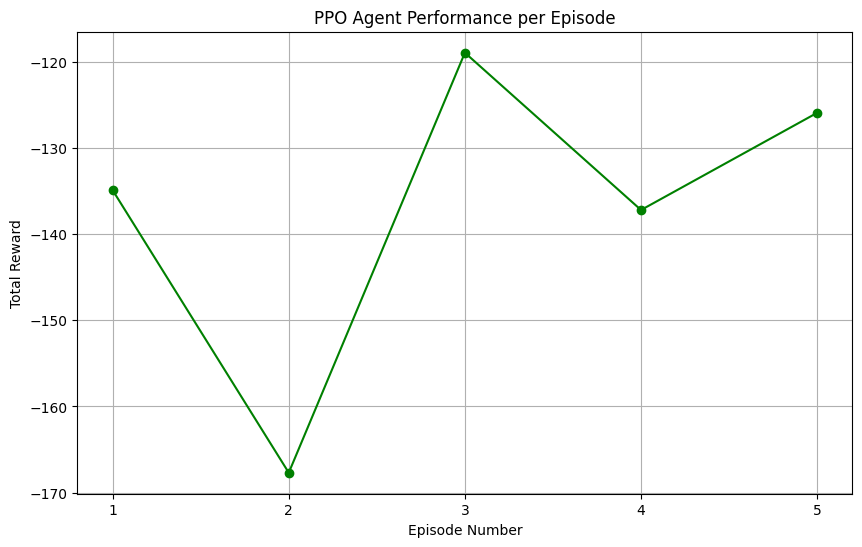

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [70]:
num_eval_episodes = 5
ppo_episode_scores = []

for i in range(num_eval_episodes):
    obs, info = env_eval_ppo_rendered.reset()
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action, _states = model_ppo.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env_eval_ppo_rendered.step(action)
        total_reward += reward

    ppo_episode_scores.append(total_reward)

print(f"PPO Scores for each episode: {ppo_episode_scores}")

average_ppo_score = np.mean(ppo_episode_scores)
print(f"Average PPO score over {num_eval_episodes} episodes: {average_ppo_score:.2f}")

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_eval_episodes + 1), ppo_episode_scores, marker='o', linestyle='-', color='g')
plt.title('PPO Agent Performance per Episode')
plt.xlabel('Episode Number')
plt.ylabel('Total Reward')
plt.grid(True)
plt.xticks(range(1, num_eval_episodes + 1))
plt.show()

env_eval_ppo_rendered.play()
env_eval_ppo.close()

In [71]:
print(f"DQN Agent - Average Evaluation Score: {average_dqn_score:.2f}")
print(f"DQN Agent - Training Time: {dqn_train_time:.2f} seconds\n")

print(f"PPO Agent - Average Evaluation Score: {average_ppo_score:.2f}")
print(f"PPO Agent - Training Time: {ppo_train_time:.2f} seconds")

DQN Agent - Average Evaluation Score: 178.95
DQN Agent - Training Time: 491.07 seconds

PPO Agent - Average Evaluation Score: -136.94
PPO Agent - Training Time: 124.20 seconds


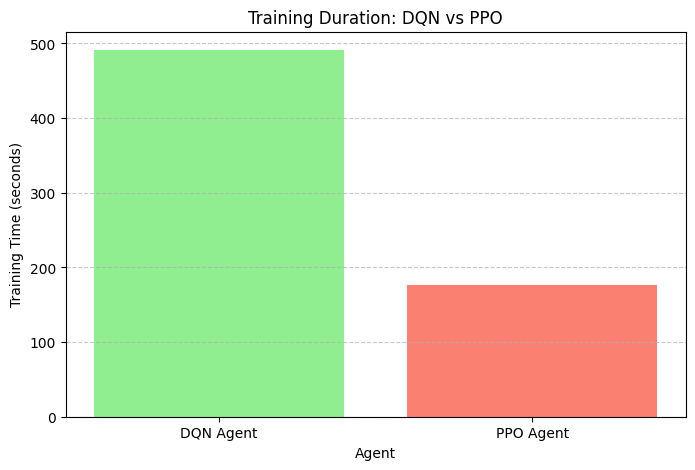

In [66]:
training_times = [dqn_train_time, ppo_train_time]
agents = ['DQN Agent', 'PPO Agent']

plt.figure(figsize=(8, 5))
plt.bar(agents, training_times, color=['lightgreen', 'salmon'])
plt.xlabel('Agent')
plt.ylabel('Training Time (seconds)')
plt.title('Training Duration: DQN vs PPO')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()